#### 회귀분석

In [3]:
import warnings
warnings.filterwarnings(action='ignore')

import os
import random
import pandas as pd
import seaborn as sb

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

import platform 

if (platform.system() == 'Windows'):  # Windows
    rc('font', family=font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name())
    path = '.' # Local
else:    
    plt.rc('font', family='NanumBarunGothic')  # Ubuntu 18.04 기준 한글 처리
    path = '/content/drive/My Drive/ai/core' # Colab

plt.rcParams["font.size"] = 12         # 글자 크기
# plt.rcParams["figure.figsize"] = (10, 4) # 인치단위 그래프 크기
plt.rcParams['axes.unicode_minus'] = False  # minus 부호는 unicode 적용시 한글이 깨짐으로 설정

# Jupyter에게 matplotlib 그래프를 출력 영역에 표시할 것을 지시하는 명령
%matplotlib inline

In [4]:
X = [i for i in range(6)] # 0 ~ 5: 공부 시간
print(X)

[0, 1, 2, 3, 4, 5]


In [3]:
# y = ax + b: 직선의 방정식, 1차 함수, 단순 선형 회귀
y1 = [5 * x + 20 for x in X]
y2 = [10 * x + 20 for x in X]
y3 = [20 * x + 20 for x in X]
y4 = [-3 * x + 50 for x in X]

print(y1)
print(y2)
print(y3)
print(y4)

[20, 25, 30, 35, 40, 45]
[20, 30, 40, 50, 60, 70]
[20, 40, 60, 80, 100, 120]
[50, 47, 44, 41, 38, 35]


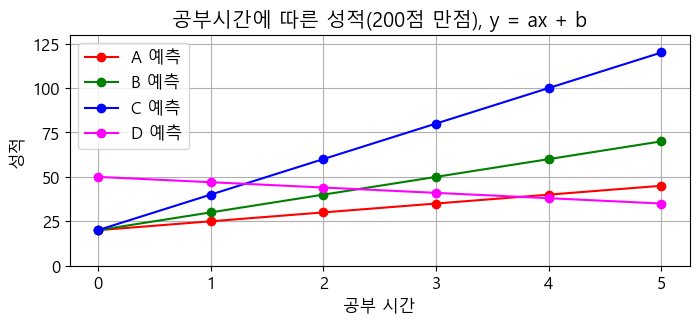

In [4]:
plt.figure(figsize=(8, 3)) # 단위: 인치
# X 공부 시간, Y: 실제 취득 성적
plt.plot(X, y1, color='red', linestyle='solid', marker='o', label='A 예측')
plt.plot(X, y2, color='green', linestyle='solid', marker='o', label='B 예측')
plt.plot(X, y3, color='blue', linestyle='solid', marker='o', label='C 예측')
plt.plot(X, y4, color='magenta', linestyle='solid', marker='o', label='D 예측')
plt.ylim(0, 130) # y limit: 범위
plt.grid(True) # 격자 출력
plt.title('공부시간에 따른 성적(200점 만점), y = ax + b')
plt.xlabel('공부 시간')
plt.ylabel('성적')
plt.legend()
plt.show()
# a: 기울기, 어떤수를 지정하는가에 따라 공부시간당 성적이 변경됨.
# b: y 절편, 편향, Bias, 곱하기의 성질상 x가 0이면 무조건 0이되는 문제 해결, 공부를 못해도 점수를 취득하는경우의 표현
# 3명의 전문가가 '공부 시간'에 따른 '성적'을 예측한 경우, x 값에 따른 y의 예측

In [5]:
# 기울기와 편향이 예측값에 영향을 발생 시킴 -> 훌륭한 전문가는 정확한 기울기와 편향을 예측할것이다. -> 정확한 점수

#### 단순 선형 회귀 실습
- Y = aX+b
- a= (∑XY - nXbarYbar) / (∑X²-nXbar²)  : 기울기 계산
- b = Ybar - aXbar : 절편 계산

In [6]:
# 여러개의 데이터에 대한 단순 선형 회귀 구현
X = [v for v in range(0, 10)] # 독립 변수
print(f'X: {X}')

Y = [(x * 2) for x in X]      # 종속 변수: (기울기 * 독립변수) + 편향
print(f'Y: {Y}')

X = np.array(X) # list -> ndarray
Y = np.array(Y)

Ybar = Y.mean() # Ybar, Y 평균
print('Ybar:', Ybar)

Xbar = X.mean()  # Xbar, X 평균
print('Xbar:', Xbar)

# ∑XY
tot = 0
for i in range(0, len(X)):
    # print(i)
    tot = tot + (X[i] * Y[i])
    
print('tot:', tot)

# nXbarYbar
nXbarYbar = len(X) * Xbar * Ybar
print('nXbarYbar:', nXbarYbar)

# ∑X²
X_square = [v ** 2 for v in X]
print('Xsquare:', X_square)
print('Xsquare:', sum(X_square))

# nXbar²
nXbar_square = len(X) * (Xbar ** 2)
print('nXbar_square:', nXbar_square)

# Y = aX+b
a= (tot - nXbarYbar) / (sum(X_square) - nXbar_square) # 기울기
b = Ybar - a * Xbar # 편향
print('완성된 모델: Y = {0} x X + {1}'.format(a, b))

X: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Y: [0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
Ybar: 9.0
Xbar: 4.5
tot: 570
nXbarYbar: 405.0
Xsquare: [0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
Xsquare: 285
nXbar_square: 202.5
완성된 모델: Y = 2.0 x X + 0.0


In [6]:
p = 2.0 * 2 + 0.0 # x가 2일경우
print(p)

4.0


#### 불확실한 데이터의 단순 선형 회귀 분석

In [7]:
# 실제 데이터는 대부분 여러가지 변수에 의하여 예측하기 어려움
# 난수 기반의 가상의 데이터 생성
import random

random.seed(0)

X=np.array([i for i in range(60, 81)]) # 공부시간
Y=np.array([i + random.randint(0, 10) for i in range(60, 81)]) # 취득 성적, 50 ~ 90
print(f'공부시간: {X}')
print(f'취득성적: {Y}')

공부시간: [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80]
취득성적: [66 67 62 67 72 72 72 71 75 74 79 74 80 75 78 77 77 86 82 87 89]


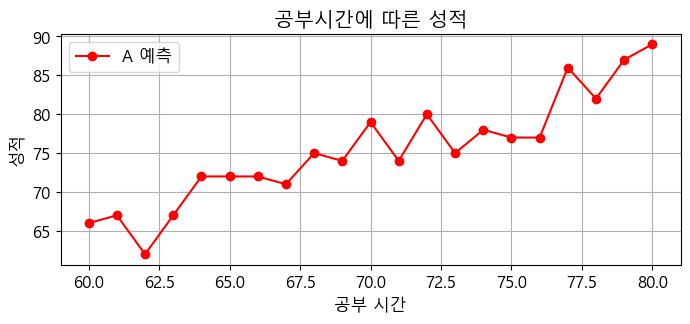

In [8]:
plt.figure(figsize=(8, 3)) # 단위: 인치
plt.plot(X, Y, color='red', linestyle='solid', marker='o', label='A 예측')
plt.grid(True) # 격자 출력
plt.title('공부시간에 따른 성적')
plt.xlabel('공부 시간')
plt.ylabel('성적')
plt.legend()
plt.show()

In [9]:
# 여러개의 데이터에 대한 단순 선형 회귀 구현
Ybar = Y.mean() # Ybar, Y 평균
Xbar = X.mean()  # Xbar, X 평균

# ∑XY
tot = 0
for i in range(0, len(X)):
    # print(i)
    tot = tot + (X[i] * Y[i])
    
print('tot:', tot)

# nXbarYbar
nXbarYbar = len(X) * Xbar * Ybar
print('nXbarYbar:', nXbarYbar)

# ∑X²
X_square = [v ** 2 for v in X]
print('Xsquare:', X_square)
print('Xsquare:', sum(X_square))

# nXbar²
nXbar_square = len(X) * (Xbar ** 2)
print('nXbar_square:', nXbar_square)

# Y = aX+b
a= (tot - nXbarYbar) / (sum(X_square) - nXbar_square) # 기울기
b = Ybar - a * Xbar # 편향
print('완성된 모델: Y = {0} x X + {1}'.format(a, b))

tot: 111544
nXbarYbar: 110740.0
Xsquare: [3600, 3721, 3844, 3969, 4096, 4225, 4356, 4489, 4624, 4761, 4900, 5041, 5184, 5329, 5476, 5625, 5776, 5929, 6084, 6241, 6400]
Xsquare: 103670
nXbar_square: 102900.0
완성된 모델: Y = 1.044155844155844 x X + 2.2424242424242493


In [10]:
# 완성된 모델: Y = 1.0311688311688123 x X + 1.9134199134212366 <- aX + b
X=np.array([i for i in range(60, 81)]) # 공부시간
p=np.array([1.0311688311688123 * x + 1.9134199134212366 for x in range(60, 81)]) # 취득 성적, 50 ~ 90
print(f'공부시간: {X}')
print(f'취득성적: {p}')

공부시간: [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80]
취득성적: [63.78354978 64.81471861 65.84588745 66.87705628 67.90822511 68.93939394
 69.97056277 71.0017316  72.03290043 73.06406926 74.0952381  75.12640693
 76.15757576 77.18874459 78.21991342 79.25108225 80.28225108 81.31341991
 82.34458874 83.37575758 84.40692641]


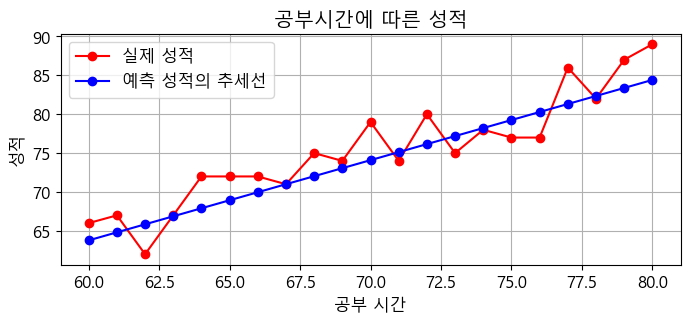

In [11]:
plt.figure(figsize=(8, 3)) # 단위: 인치
plt.plot(X, Y, color='red', linestyle='solid', marker='o', label='실제 성적')
plt.plot(X, p, color='blue', linestyle='solid', marker='o', label='예측 성적의 추세선')
plt.grid(True) # 격자 출력
plt.title('공부시간에 따른 성적')
plt.xlabel('공부 시간')
plt.ylabel('성적')
plt.legend()
plt.show()

In [12]:
avg = np.mean(Y) # 취득 성적 평균
print(avg)

# 편차: 평균과의 차이
deviation = Y - avg  # 취득 성적 - 평균 
print(f'deviation: {deviation}')

# 편차의 합
deviation_tot = deviation.sum()
print(f'deviation total: {deviation_tot: .0f}')

75.33333333333333
deviation: [ -9.33333333  -8.33333333 -13.33333333  -8.33333333  -3.33333333
  -3.33333333  -3.33333333  -4.33333333  -0.33333333  -1.33333333
   3.66666667  -1.33333333   4.66666667  -0.33333333   2.66666667
   1.66666667   1.66666667  10.66666667   6.66666667  11.66666667
  13.66666667]
deviation total:  0


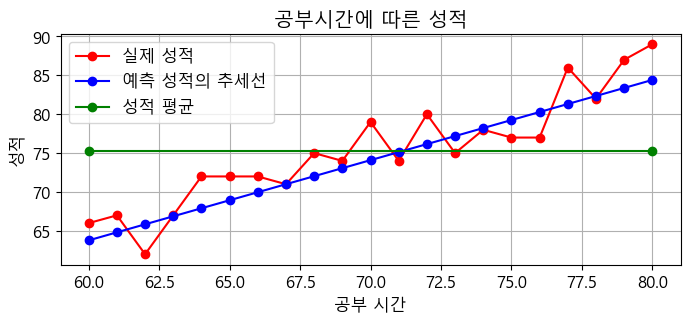

In [13]:
plt.figure(figsize=(8, 3)) # 단위: 인치
plt.plot(X, Y, color='red', linestyle='solid', marker='o', label='실제 성적')
plt.plot(X, p, color='blue', linestyle='solid', marker='o', label='예측 성적의 추세선')
plt.plot([60, 80], [75.333, 75.333], color='green', linestyle='solid', marker='o', label='성적 평균')
plt.grid(True) # 격자 출력
plt.title('공부시간에 따른 성적')
plt.xlabel('공부 시간')
plt.ylabel('성적')
plt.legend()
plt.show()

In [14]:
# 그래프를 확인하니 편차는 존재한다!!!
# deviation total: 0, 편차의 합은 0이라는 논리적 모순에 빠짐.
# 편차의 합은 0이지만 편차의 크기를 알고 싶다!!!
deviation2 = deviation ** 2
print(deviation2)
deviation2_tot = np.sum(deviation2)
print(f'편차의 합: {deviation2_tot}')

# 편차의 합을 공평하게 데이터의 수로 나누자 -> 분산
variance = deviation2_tot / len(deviation)
print(f'분산: {variance}') # 부호를 바꾸기위하여 편차를 제곱한문제가 있음
standard_deviation = np.sqrt(variance) # 제곱의 해제
print(f'표준편차: {standard_deviation}') # 학생들은 예측 점수보다 평균 6.861점 차이가 남.

[8.71111111e+01 6.94444444e+01 1.77777778e+02 6.94444444e+01
 1.11111111e+01 1.11111111e+01 1.11111111e+01 1.87777778e+01
 1.11111111e-01 1.77777778e+00 1.34444444e+01 1.77777778e+00
 2.17777778e+01 1.11111111e-01 7.11111111e+00 2.77777778e+00
 2.77777778e+00 1.13777778e+02 4.44444444e+01 1.36111111e+02
 1.86777778e+02]
편차의 합: 988.6666666666666
분산: 47.079365079365076
표준편차: 6.861440452220297


y = aX + b에서 데이터를 읽고 오차가 가장 작은 a, b를 찾는 과정을 머신러닝이라고함.

데이터의 규칙(패턴)을 발견하고 최적의 a, b를 찾게됨.
모델(a: 기울기, b: y 절편)이 발견되면 새로운 X를 대입하여 y를 예측 할 수 있음. 

- 데이터 1개: y = a1X1 + b 로 예측 가능, 2차원 그래프로 값 표현 가능
- 데이터 2개: y = a1*X1 + a2*X2 + b 로 해결 가능, 3차원 그래프로 값 표현 가능
- 데이터 3개: y = a1*X1 + a2*X2 + a3*X3 + b 로 해결 가능, 4차원 그래프로 값 표현 가능
- 관계형 데이터베이스의 변수(컬럼)는 보통 10 ~ 20개 이상임으로 
- 개발자가 직접 선형회귀 구현 어려움

선형회귀를 이용한 도시형/귀촌/귀농에 성공한 사람들의 패턴을 파악하여 고객 진단
- 시골에 가족(친척)이 있는지 여부
- 시골에서 생활한 경험
- 자택 소유
- 토지
- 1년의 여행 횟수
- 음주 횟수
- 운전면허 소유 여부
- 차량 소유 여부
- 성격
- 판정(도시형/귀촌/귀농), class

> 머신러닝은 각각의 변수의 기울기, 편향을 알아내고 선형회귀/분류 알고리즘을 이용하여 도시형인지 시골형인지 진단.

> 딥러닝은 신경망(회귀)에 기반하여 도시형인지 시골형인지 진단

> 용어의 정리
- 독립 변수, 원인 변수: 시골에 가족(친척)이 있는지 여부, 시골에서 생활한 경험, 자택 소유, 토지, 1년의 여행 횟수, 음주 횟수, ...
- 종속 변수, Target: 판정(도시형/귀촌/귀농)
- 종속 변수는 독립 변수의 결과로 생성됨으로 '독립변수'의 영향을 받아 '종속변수'라고 한다.
- 회귀 분석은 독립변수를 이용하여 '기울기'와 '편향'을 찾아 '종속 변수'를 산출하는 과정